## Resolución de Ecuaciones Diferenciales con Python

### *Ecuación logistica:
$$\frac{dp}{dt}=ap-bp^2$$ 
con $$p(0)=p_0$$

Primero importamos las librerias a utilizar:

In [2]:
import sympy as sp #Libreria calculo simbolico
import matplotlib.pyplot as plt #Libreria para graficas
import matplotlib as mpl
import numpy as np #Liberia para calculos numericos
import scipy  #libreria para herramientas adicionales, 
               #estadistica, optimizacion, etc
sp.init_printing() #LIbreria para visualizar las ecuaciones

In [24]:
#Agregamos las variables que se encuentran en la ED
p=sp.Function('p') #variable dependiente de la función
t=sp.symbols('t')  #variable independiente de la función
a=sp.symbols('a')  #variables extras
b=sp.symbols('b')
p0=sp.symbols('p0')

In [25]:
ode=sp.Eq(sp.Derivative(p(t),t)-a*p(t)+b*p(t)*p(t),0) #comando para escribir la ED
sol = sp.dsolve(ode,p(t),ics={p(0):p0}) #Resolver la ED con el valor inicial p(0)=0

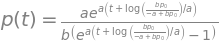

In [26]:
sol #imprimimos el resultado obtenido

In [27]:
#Podemos definir algunas constantes para resolver la ED con el siguiente
#comando
constants={a:0.03,b:0.0001,p0:5} # comando para definir valores para de las constantes para ED
sol1=sol.subs(constants)  #comando para obtener las solución de la ED a partir de las constantes definidas
constants={a:0.03,b:0.0001,p0:6}
sol2=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:7}
sol3=sol.subs(constants)

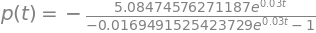

In [28]:
sol1

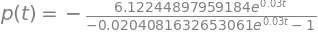

In [29]:
sol2

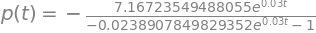

In [30]:
sol3

In [31]:
#Con los siguiente comandos podemos hacer que las soluciones sol1,sol2 y sol3
#puedan ser graficadas transformandolas en funciones
func1 = sp.lambdify(t,sol1.rhs,'numpy')
func2 = sp.lambdify(t,sol2.rhs,'numpy')
func3 = sp.lambdify(t,sol3.rhs,'numpy')

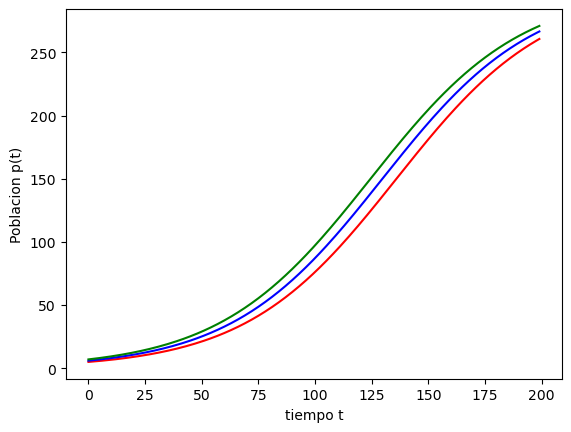

In [37]:
#Por ultimo graficamos las soluciones con el siguiente codigo
tt = np.arange(0,200,1) #Los primeros numeros represetna el intervalo 
                        #a tomar del dominio de la función 
pp1 = func1(tt)
pp2 = func2(tt) #Comando para dibujar las funciones
pp3 = func3(tt)

plt.plot(tt,pp1,'r',tt,pp2,'b',tt,pp3,'g')
plt.xlabel('tiempo t') #Comando para agregar nombres a los ejes
plt.ylabel('Poblacion p(t)')
plt.show() #Mostrar la grafica

In [40]:
#Este comando es utilizado para obtener algunos metodos de solucion
# de la ED y su clasificación
sp.classify_ode(ode)

('factorable',
 'separable',
 '1st_exact',
 'Bernoulli',
 '1st_rational_riccati',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

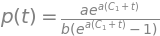

In [44]:
#Con el siguiente comando podemos verificar si la solución obtenida
#satisface la ED
sol=sp.dsolve(ode,p(t))
sol

In [45]:
#Si es verdadero el valor entonces nos arroja true
#  si no lo es arroja false
sp.checkodesol(ode,sol)

(True, 0)

### *Ecuación de Lagrange

$$y=2xy'+log(y')$$

In [2]:
#Definimos las variables
x=sp.symbols('x')
y=sp.Function('y')

In [4]:
#Importamos la funcion logaritmo para que la reconozca
from sympy import log 
#Agregamos  la ecuacion
ode2=sp.Eq(log(sp.Derivative(y(x),x))+2*x*sp.Derivative(y(x),x)-y(x),0)
#Le pedimos que clasifique la ecuación
sp.classify_ode(ode2)

('factorable', 'lie_group')

In [5]:
#Resuelve la ecuación
sol2 = sp.dsolve(ode2,y(x))

In [6]:
#Muestra la solucióm
sol2

Donde $W$ es la función de Lambert $W(z)$

### *Resonancia

$$y''+16y=8sen(4t)$$
con
$y(0)=1$ , $y'(0)=0$

In [3]:
from sympy import * #importamos el operador de multiplicación
t=sp.symbols('t')
y=sp.Function('y')

In [4]:
ode3=sp.Eq(sp.Derivative(y(t),t,t)+16*y(t)-8*sin(4*t),0)
sp.classify_ode(ode3)

('nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

In [5]:
sol3 = sp.dsolve(ode3,y(t))

In [6]:
sol3

In [7]:
# Evaluando las condiciones iniciales
const=sp.solve([sol3.rhs.subs(t,0)-1, sol3.rhs.diff(t,1).subs(t,0)-0])
C1, C2 = sp.symbols('C1,C2')
sol3=sol3.subs(const)

In [8]:
sol3

In [10]:
#Generamos el resultado anterior como función para graficar
func1 = sp.lambdify(t,sol3.rhs,'numpy')
import scipy
xx = np.arange(0,10,.1)
yy1 = func1(xx)

C:\Users\Javier\AppData\Local\Temp\ipykernel_5588\3674668103.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xx,yy1,'r', color='green')


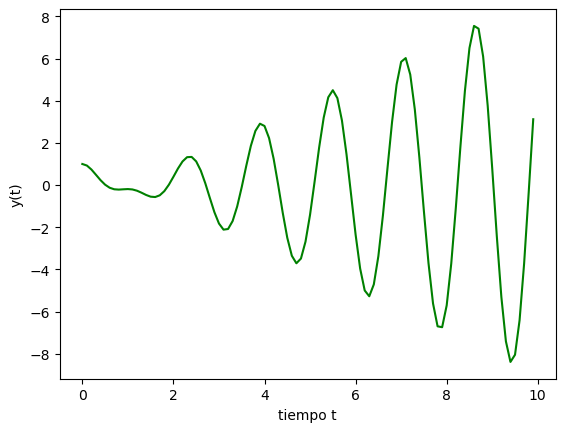

In [12]:
#Graficamos
plt.plot(xx,yy1,'r', color='green') #comando color para ambiar el color de la graf.
plt.xlabel('tiempo t') #Titulos de los ejes
plt.ylabel('y(t)')
plt.show()

### *Ecuación de 3er Orden.

$$y'''-y''-y'+y=g(t)$$

In [15]:
#Definimos las variables
t=sp.symbols('t')
y=sp.Function('y')
g=sp.Function('g')

In [16]:
#Agregamos la ecuacion
ode4=sp.Eq(sp.Derivative(y(t),t,3)-sp.Derivative(y(t),t,t)-sp.Derivative(y(t),t)+y(t)-g(t),0)
#Aplicamos el comando para observar que clasificacion tiene
sp.classify_ode(ode4)

('factorable',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

In [17]:
#Resolvemos la ecuación
sol4 = sp.dsolve(ode4,y(t))

In [18]:
#Mostramos el resultado
sol4

### *Una ecuación homogénea de Cauchy-Euler de cuarto orden

$$x^4y^{(4)}(x)+6x^3y^{(3)}(x)+9x^2y''(x)+3xy'(x)+y(x)=0$$

In [20]:
#Definimos las variables
x=sp.symbols('x')
y=sp.Function('y')

In [23]:
#Importamos el operador *
from sympy import *
#Agregamos la ED:
ode5=sp.Eq(x**4*sp.Derivative(y(x),x,4)+6*x*x*x*sp.Derivative(y(x),x,3)+ 9*x**2*sp.Derivative(y(x),x,2)+3*x*sp.Derivative(y(x),x)+y(x),0)

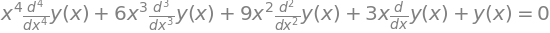

In [24]:
ode5

In [25]:
sol5=sp.dsolve(ode5,y(x))

In [26]:
sol5

In [28]:
#Verificamos si es un resultado para la ED:
sp.checkodesol(ode5,sol5)

(True, 0)

Si sabemos un cambio de variable adecuado que puede simplificar la ED, podemos agregar ese cambio de variable con el siguiente comando:


In [31]:
#un m´etodo de soluci´ on de las ecuaciones de Cauchy 
# Euler implica la substitucion y = x^n
n=sp.symbols('n')
eq=simplify(ode5.subs(y(x),x**n))

#Imprimimos la ecuación auxiliar:
factor(eq)

In [35]:
#Probemos el cambio de variable y=log(x)
from sympy import log
n1=sp.symbols('n1')
eq1=simplify(ode5.subs(y(x),log(x)))
factor(eq1)

### Un problema de valor inicial con deltas de Dirac como fuentes

$$y''(t)-4y'(t)+4y(t)=3\delta(t-1)+\delta(t-2)$$
con
$$y(0)=1$$
$$y'(0)=1$$

In [36]:
#declaramos nuestras variables
t=sp.symbols('t')
y=sp.Function('y')

In [37]:
from sympy import *
#esciribimos la ED
ode6=sp.Eq(sp.Derivative(y(t),t,2)-4*sp.Derivative(y(t),t)+ 4*y(t),3*DiracDelta(t-1)+DiracDelta(t-2))

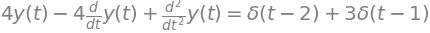

In [38]:
ode6

In [40]:
#resolvemos la ED
sol6 = sp.dsolve(ode6)

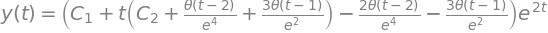

In [43]:
sol6

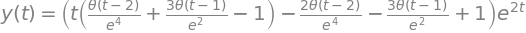

In [45]:
#Evaluamos las condiciones iniciales
constants=solve([sol6.rhs.subs(t,0)-1,sol6.rhs.diff(t,1).subs(t,0)-1])
#Resolvemos la ED con las condiciones iniciales
sol6.subs(constants)